In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import torch

sys.path.append("..")

from neural_rk.dataset import Dataset
from neural_rk.path import DATA_DIR

In [13]:
name = "A"
df_train = pd.read_pickle(DATA_DIR / f"burgers_{name}_train.pkl")
df_val = pd.read_pickle(DATA_DIR / f"burgers_{name}_val.pkl")
df_test = pd.read_pickle(DATA_DIR / f"burgers_{name}_test.pkl")

train_dataset = Dataset(df_train)
val_dataset = Dataset(df_val)
test_dataset = Dataset(df_test)

train_y = torch.cat([data.y.reshape(-1, 2) for data in train_dataset.data], dim=0).numpy()
val_y = torch.cat([data.y.reshape(-1, 2) for data in val_dataset.data], dim=0).numpy()
test_y = torch.cat([data.y.reshape(-1, 2) for data in test_dataset.data], dim=0).numpy()


# Statistics over samples

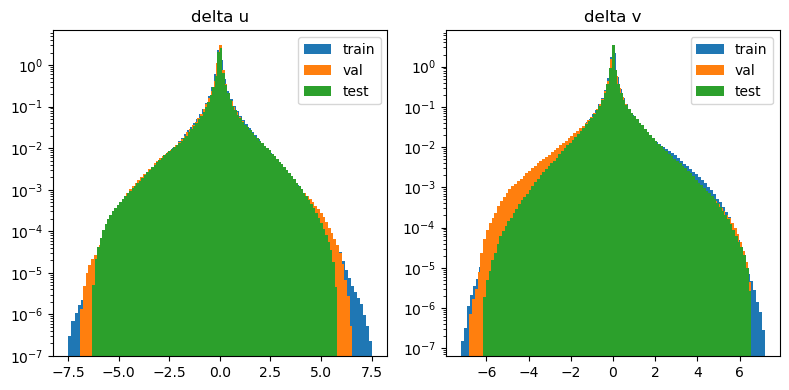

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)

ax1.set_title("delta u")
ax1.hist(train_y[..., 0], bins=100, label="train", density=True)
ax1.hist(val_y[..., 0], bins=100, label="val", density=True)
ax1.hist(test_y[..., 0], bins=100, label="test", density=True)
ax1.legend()
ax1.set_yscale("log")

ax2.set_title("delta v")
ax2.hist(train_y[..., 1], bins=100, label="train", density=True)
ax2.hist(val_y[..., 1], bins=100, label="val", density=True)
ax2.hist(test_y[..., 1], bins=100, label="test", density=True)
ax2.legend()
ax2.set_yscale("log")


fig.tight_layout()
fig.show()